## Analisi diffuzione COVID-19 nel mondo

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
filepath = "../Esercizio_finale/owid-covid-data.csv"
df = pd.read_csv(filepath)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387290,ZWE,Africa,Zimbabwe,2024-03-13,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387291,ZWE,Africa,Zimbabwe,2024-03-14,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387292,ZWE,Africa,Zimbabwe,2024-03-15,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387293,ZWE,Africa,Zimbabwe,2024-03-16,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


1. Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [4]:
df.shape

(387295, 67)

In [5]:
df.info() #metadati e non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387295 entries, 0 to 387294
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387295 non-null  object 
 1   continent                                   368751 non-null  object 
 2   location                                    387295 non-null  object 
 3   date                                        387295 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [9]:
# somma dei valori nulli
df.isnull().sum()

iso_code                                        0
continent                                   18544
location                                        0
date                                            0
total_cases                                 38962
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       374108
excess_mortality_cumulative                374108
excess_mortality                           374108
excess_mortality_cumulative_per_million    374108
Length: 67, dtype: int64

In [7]:
# conversione del formato della colonna data da dtype object a un dtype datetime64[ns]
df["date"] = pd.to_datetime(df["date"])
df["date"].dtype

dtype('<M8[ns]')

2. Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [9]:
# total_cases presenta dei valori cumulati, pertanto si fa riferimento alla colonna new_cases
df_drop = df.dropna(subset="continent")
casi_totali_per_continente = df_drop.groupby("continent")["new_cases"].sum()

print("Numero casi totali per continente:\n", casi_totali_per_continente.map('{:,.0f}'.format))

Numero casi totali per continente:
 continent
Africa            13,141,282
Asia             301,446,461
Europe           252,376,812
North America    124,530,643
Oceania           14,808,170
South America     68,718,448
Name: new_cases, dtype: object


3. Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [12]:
df.loc[:,"continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [23]:
# input dei nomi dei due continenti
continente1 = input("Inserire il nome del primo continente: ")
continente2 = input("Inserire il nome del secondo continente: ")

# selezione delle righe con i due continenti di input
casi_continente1 = df_drop[df_drop['continent'] == continente1]['new_cases']
casi_continente2 = df_drop[df_drop['continent'] == continente2]['new_cases']

# calcolo dei descrittori statistici per ciascun continente
continente1_max = casi_continente1.max()
continente2_max = casi_continente2.max()

continente1_mean = casi_continente1.mean()
continente2_mean = casi_continente2.mean()

casi_totali_mondo = df['new_cases'].sum()

continente1_percentuale = (casi_continente1.sum() / casi_totali_mondo) * 100
continente2_percentuale = (casi_continente2.sum() / casi_totali_mondo) * 100

print(f"Descrittori statistici per il continente {continente1}:")
print(f"Valore massimo: {continente1_max:.0f}")
print(f"Media: {continente1_mean:.2f}")
print(f"Percentuale rispetto al numero dei casi totali nel mondo: {continente1_percentuale:.2f}%\n")

print(f"Descrittori statistici per il continente {continente2}:")
print(f"Valore massimo: {continente2_max:.0f}")
print(f"Media: {continente2_mean:.2f}")
print(f"Percentuale rispetto al numero dei casi totali nel mondo: {continente2_percentuale:.2f}%")


Inserire il nome del primo continente:  Europe
Inserire il nome del secondo continente:  Asia


Descrittori statistici per il continente Europe:
Valore massimo: 2417043
Media: 3257.74
Percentuale rispetto al numero dei casi totali nel mondo: 7.68%

Descrittori statistici per il continente Asia:
Valore massimo: 40475477
Media: 4181.24
Percentuale rispetto al numero dei casi totali nel mondo: 9.18%


#### Commento
Si notano basse percentuali rispetto al numero dei casi totali nel mondo, dovuti ai valori NaN in continent che rappresenta oltre il 70% del campione di dati. 

4. Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

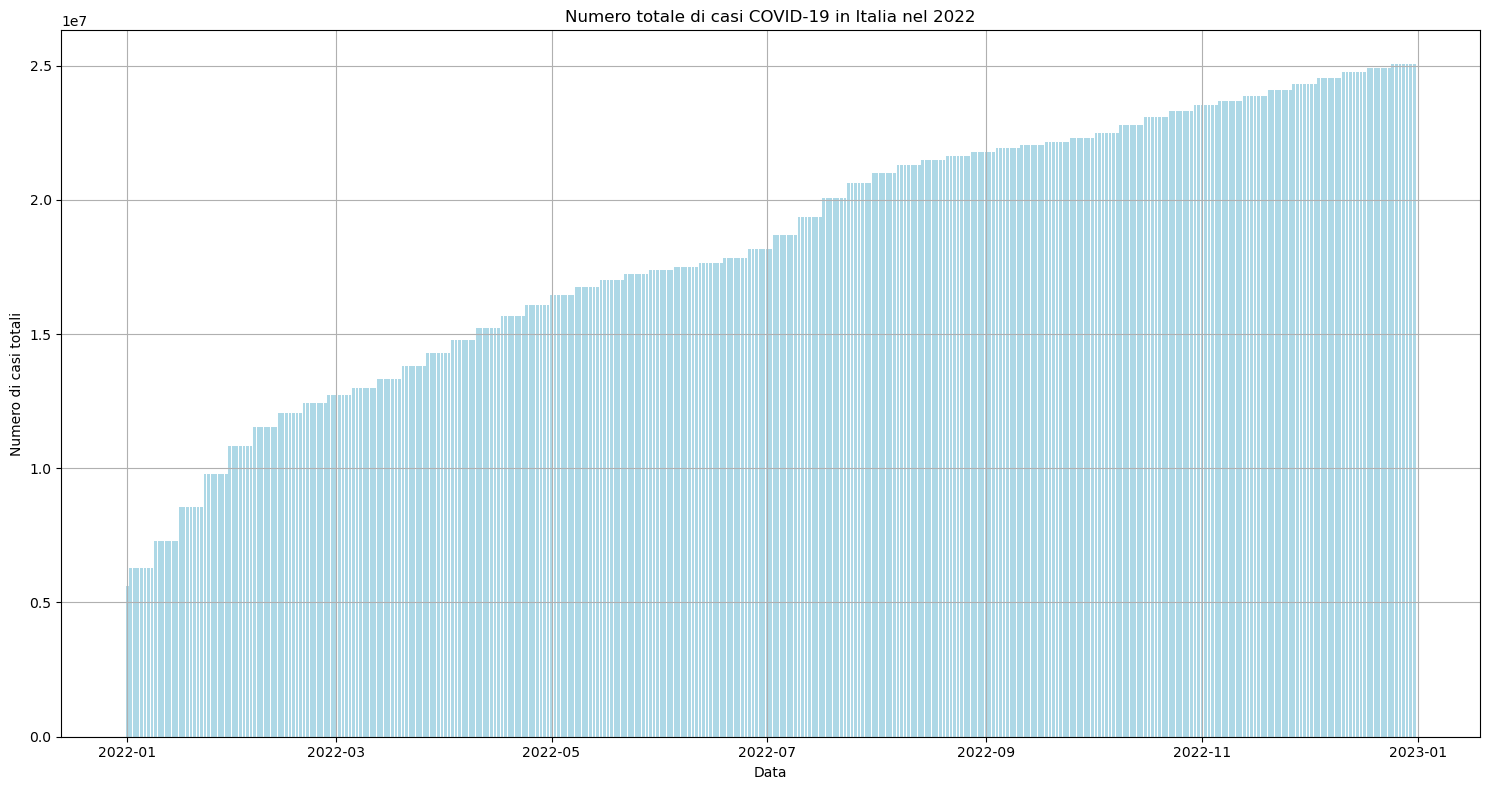

In [38]:
# filtro dati per italia e anno 2022
filtro_italia = df[(df["location"].str.contains("Italy")) & (df["date"].dt.year == 2022)]

# raggruppamento per data e somma i casi totali per ogni giorno
casi_totali_giornalieri = filtro_italia.groupby("date")["total_cases"].max()

# grafico a barre
plt.figure(figsize=(15, 8))
plt.bar(casi_totali_giornalieri.index, casi_totali_giornalieri.values, color='lightblue')
plt.title('Numero totale di casi COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di casi totali')
plt.grid(True)
plt.tight_layout()

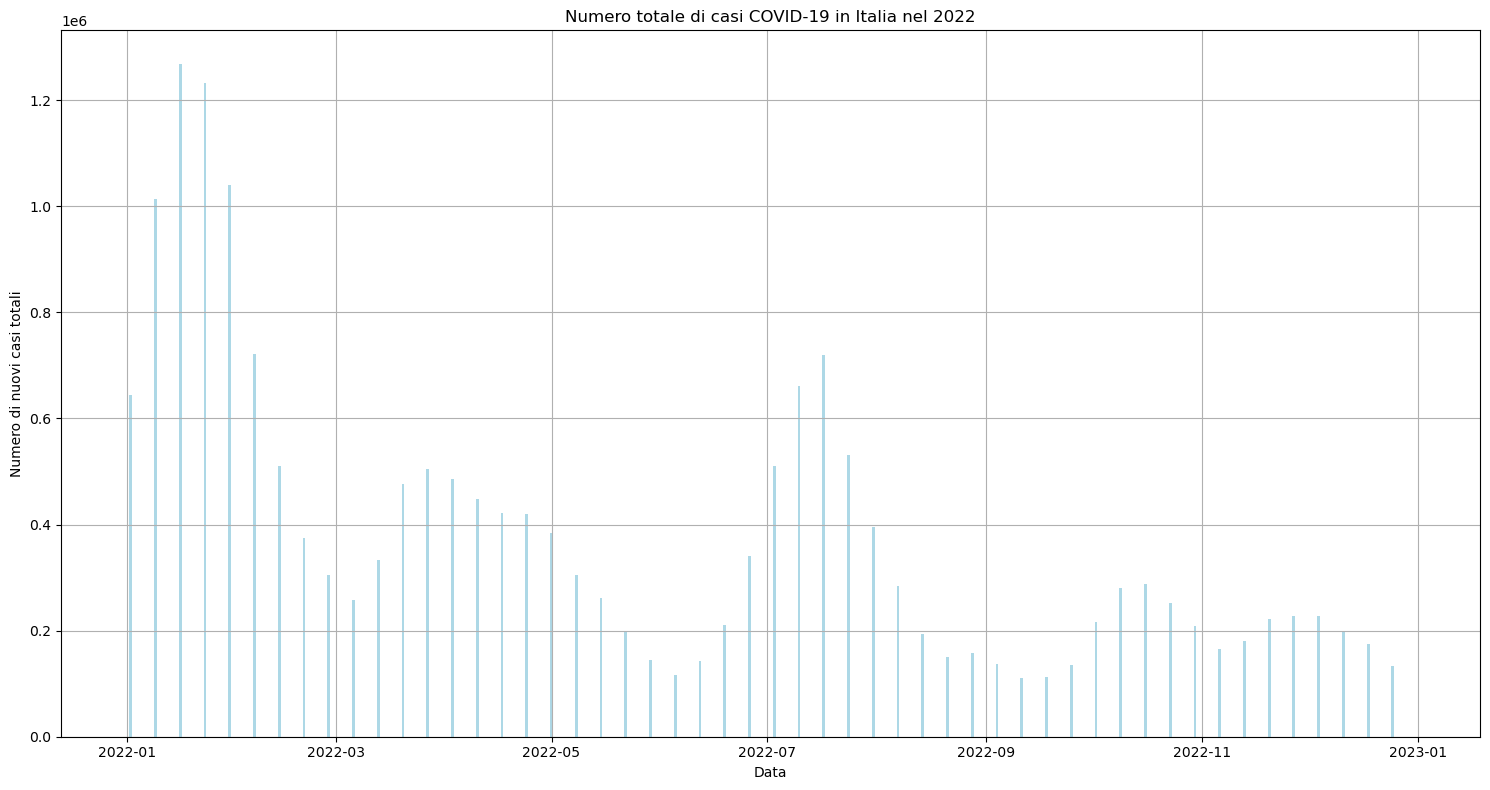

In [202]:
# raggruppamento per data e somma dei nuovi casi totali per ogni giorno
nuovi_casi_totali_giornalieri_sum = filtro_italia.groupby("date")["new_cases"].sum()
nuovi_casi_totali_giornalieri_sum

# grafico a barre
plt.figure(figsize=(15, 8))
plt.bar(nuovi_casi_totali_giornalieri_sum.index, nuovi_casi_totali_giornalieri_sum.values, color='lightblue')
plt.title('Numero totale di nuovi casi COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di nuovi casi totali')
plt.grid(True)
plt.tight_layout()


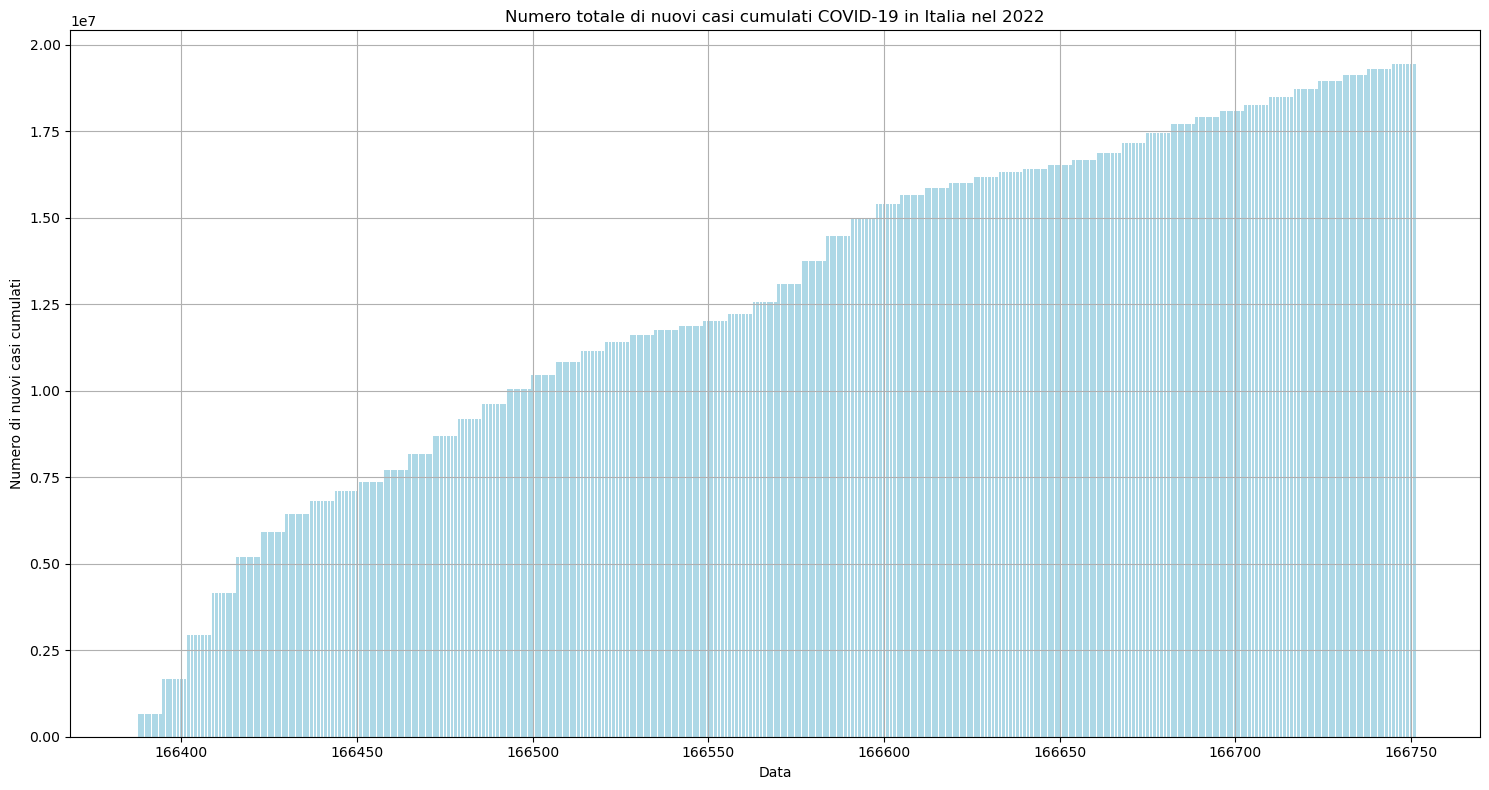

In [224]:
# Raggruppamento per data e somma i casi totali per ogni giorno

nuovi_casi_totali_giornalieri_cum = filtro_italia["new_cases"].cumsum()

# Traccia il grafico a barre
plt.figure(figsize=(15, 8))
plt.bar(nuovi_casi_totali_giornalieri_cum.index, nuovi_casi_totali_giornalieri_cum.values, color='lightblue')
plt.title('Numero totale di nuovi casi cumulati COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di nuovi casi cumulati')
plt.grid(True)
plt.tight_layout()


### Commento
Si nota una similarità tra l'andamento dei casi totali giornalieri e l'andamento cumulato dei nuovi casi. In particolare, essendo i valori della colonna new_cases aggiornati settimanalmente, si nota una un andamento a gradini sempre crescente, sia per il grafico dei casi totali che con il grafico dei nuovi casi cumulati. I due grafici, a meno del numero dei casi totali giornalieri aggiornati al 01-01-2022, risultano essere congruenti.

5. Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo; 

In [277]:
# filtro per nazioni Italia, Germania e Francia e da maggio 2022 e aprile 2023
it_ger_fr = df[(df["location"].str.contains("Italy|Germany|France")) &
               (df["date"] >= "2022-04-30") & # poichè .diff() si riferisce alla differenza tra la riga i e i-1, si considera anche il 30-04-2022
               (df["date"] <= "2023-04-30")].copy()

# calcolo delle differenze riguardo il numero di pazienti in terapia intensiva
it_ger_fr["icu_patients_diff"] = it_ger_fr.groupby("location")["icu_patients"].diff()

# calcolo statistiche 
statistiche = it_ger_fr.groupby("location")["icu_patients_diff"].describe()
statistiche


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
France,335.0,-2.546269,19.968316,-64.0,-12.5,-3.0,6.0,77.0
Germany,365.0,-2.306849,34.686018,-76.0,-26.0,-4.0,18.0,165.0
Italy,365.0,-0.720548,8.402560,-34.0,-5.0,-1.0,5.0,22.0


Text(0, 0.5, 'Differenza ICU Patients')

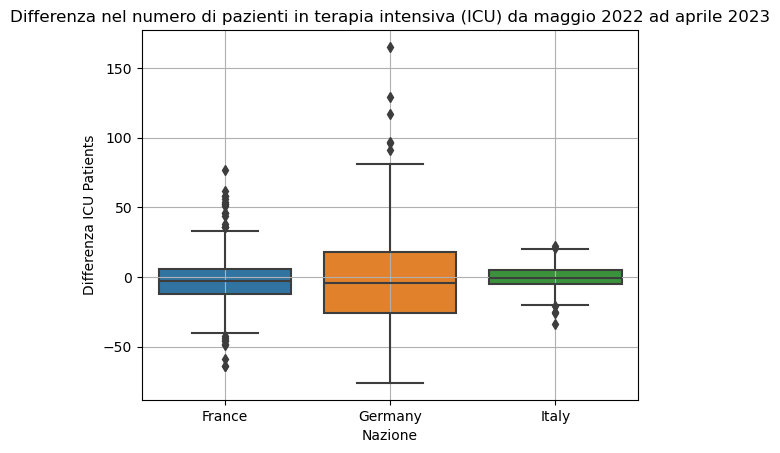

In [279]:
# grafico boxplot per it_ger_fr
sns.boxplot(data = it_ger_fr, x = "location", y = "icu_patients_diff")
plt.grid(True)
plt.title('Differenza nel numero di pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Differenza ICU Patients')

In [280]:
it_ger_fr.loc[:,["date","icu_patients_diff"]]

,date,icu_patients_diff
117392,2022-04-30,NaN
117393,2022-05-01,-5.0
117394,2022-05-02,-46.0
117395,2022-05-03,-13.0
117396,2022-05-04,-33.0
...,...,...
166867,2023-04-26,0.0
166868,2023-04-27,-1.0
166869,2023-04-28,6.0
166870,2023-04-29,6.0


#### Ricerca valori nulli
Si notano 30 valori mancanti per la Francia con 335/365, corrispondente al mese di Aprile 2023 (si nota dalla ricerca sottostante).

In [269]:
it_ger_fr.loc[it_ger_fr["icu_patients"].isnull()] 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,icu_patients_diff
117728,FRA,Europe,France,2023-04-01,38588428.0,0.0,7799.000,165869.0,0.0,24.000,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN
117729,FRA,Europe,France,2023-04-02,38645710.0,57282.0,8183.143,166079.0,210.0,30.000,...,NaN,5.98,82.66,0.901,67813000.0,116463.03,5.78,-5.08,1798.4740,NaN
117730,FRA,Europe,France,2023-04-03,38645710.0,0.0,8183.143,166079.0,0.0,30.000,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN
117731,FRA,Europe,France,2023-04-04,38645710.0,0.0,8183.143,166079.0,0.0,30.000,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN
117732,FRA,Europe,France,2023-04-05,38645710.0,0.0,8183.143,166079.0,0.0,30.000,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN
117733,FRA,Europe,France,2023-04-06,38645710.0,0.0,8183.143,166079.0,0.0,30.000,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN
117734,FRA,Europe,France,2023-04-07,38645710.0,0.0,8183.143,166079.0,0.0,30.000,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN
117735,FRA,Europe,France,2023-04-08,38645710.0,0.0,8183.143,166079.0,0.0,30.000,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN
117736,FRA,Europe,France,2023-04-09,38701054.0,55344.0,7906.286,166267.0,188.0,26.857,...,NaN,5.98,82.66,0.901,67813000.0,116129.43,5.73,-2.79,1793.3224,NaN
117737,FRA,Europe,France,2023-04-10,38701054.0,0.0,7906.286,166267.0,0.0,26.857,...,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,NaN


#### Interpolazione dei dati NaN

In [281]:
# calcolo delle differenze riguardo il numero di pazienti in terapia intensiva
it_ger_fr_inter = df[(df["location"].str.contains("Italy|Germany|France")) &
               (df["date"] >= "2022-04-30") &
               (df["date"] <= "2023-04-30")].copy()
it_ger_fr_inter["icu_patients"] = it_ger_fr["icu_patients"].interpolate()
it_ger_fr_inter["icu_patients_diff"] = it_ger_fr_inter.groupby("location")["icu_patients"].diff()

# calcolo statistiche 
statistiche_inter = it_ger_fr_inter.groupby("location")["icu_patients_diff"].describe()
statistiche_inter


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
France,365.0,-0.626867,20.177293,-64.0,-11.0,-1.0,11.0,77.0
Germany,365.0,-2.306849,34.686018,-76.0,-26.0,-4.0,18.0,165.0
Italy,365.0,-0.720548,8.402560,-34.0,-5.0,-1.0,5.0,22.0


Text(0, 0.5, 'Differenza ICU Patients')

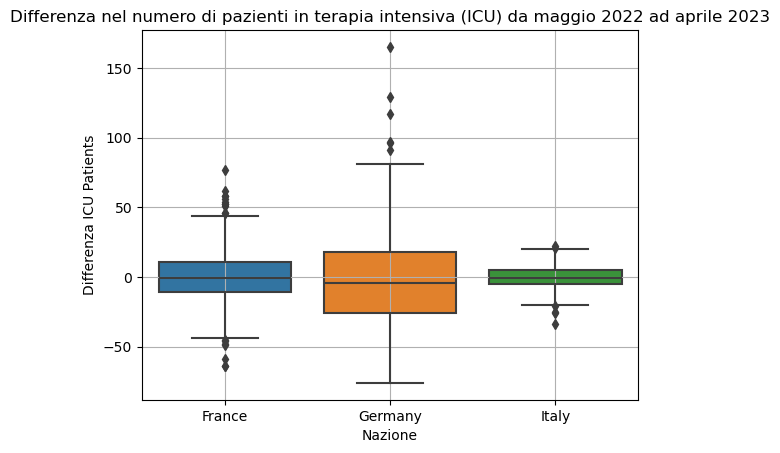

In [282]:
# grafico boxplot
sns.boxplot(data = it_ger_fr_inter, x = "location", y = "icu_patients_diff")
plt.grid(True)
plt.title('Differenza nel numero di pazienti in terapia intensiva (ICU) da maggio 2022 ad aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Differenza ICU Patients')

#### Commento 
In generale si nota che per tutte e tre le nazioni il 50° valore percentile è negativo, rappresentando quindi una dimunizione graduale dei pazienti in terapia intensiva rispetto al giorno precedente. Tale valore risulta essere maggiore in valore assoluto per la Germania.
Per l'italia, in generale, tutti i dati non si discostano molto dalla media dei ricoveri ICU giornalieri, indicando una piccola variazione significativa dei dati (std = 8.40). Mentre per la Germania e la Francia la deviazione standard è molto elevata. La Francia presenta un maggior numero di outliers rispetto agli altri paese. 
L'interpolazione lineare potrebbe aver riempito i valori mancanti in modo coerente con il trend dei dati circostanti, riducendo così la variazione complessiva e la discrepanza nella media delle differenze giornaliere.

6. Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [21]:
it_ger_fr_sp = df[(df["location"].str.contains("Italy|Germany|France|Spain")) &
               (df["date"].dt.year == 2023)]
it_ger_fr_sp

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
117638,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,122180.83,6.64,25.88,1886.7708
117639,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
117640,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
117641,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
117642,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327855,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
327856,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
327857,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
327858,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN


#### Ricerca valori nulli

In [323]:
it_ger_fr_sp.loc[:,"hosp_patients"].isnull().sum() # sono presenti 843 valori NaN

843

In [324]:
germany = it_ger_fr_sp[(it_ger_fr_sp["location"].str.contains("Germany"))]
germany.loc[:,["location","hosp_patients"]].isnull().sum()

location           0
hosp_patients    365
dtype: int64

In [ ]:
# la germania verrà esclusa dall'analisi essendo che non presenta alcun valore nel 2023

In [326]:
france = it_ger_fr_sp[it_ger_fr_sp["location"].str.contains("France")]
france.loc[:,["location","hosp_patients"]].isnull().sum()

location           0
hosp_patients    275
dtype: int64

In [ ]:
# la francia presenta 275 valori nulli

In [336]:
spain = it_ger_fr_sp[it_ger_fr_sp["location"].str.contains("Spain")]
spain.loc[:,["location","hosp_patients"]].isnull().sum()

location           0
hosp_patients    203
dtype: int64

In [ ]:
# la spagna presenta 203 valori nulli

In [329]:
italy = it_ger_fr_sp[it_ger_fr_sp["location"].str.contains("Italy")]
italy.loc[:,["location","hosp_patients"]].isnull().sum()

location         0
hosp_patients    0
dtype: int64

In [ ]:
# l'italia non presenta valori nulli

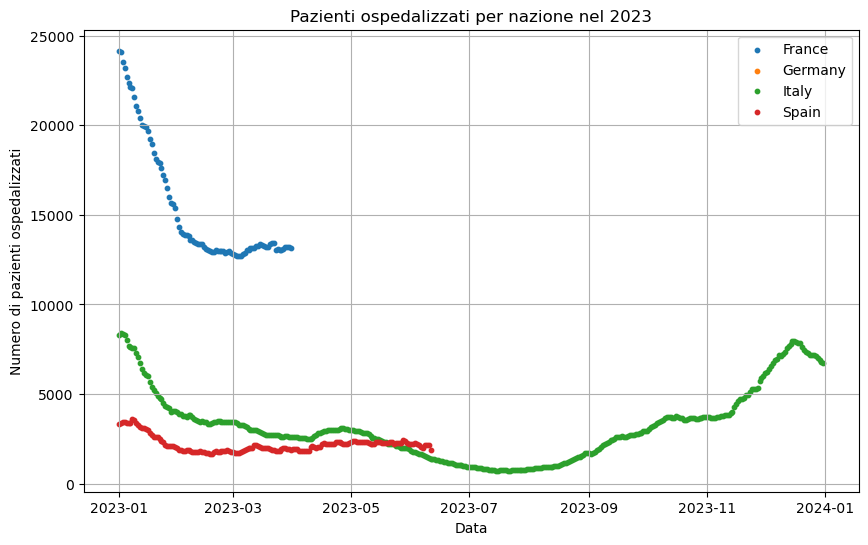

In [315]:
# grafico a dispersione per ogni nazione

plt.figure(figsize=(10, 6))
for nazione, data in it_ger_fr_sp.groupby("location"):
    plt.scatter(data["date"], data["hosp_patients"], label=nazione,  s=10)
    
plt.title("Pazienti ospedalizzati per nazione nel 2023")
plt.xlabel("Data")
plt.ylabel("Numero di pazienti ospedalizzati")
plt.legend()
plt.grid(True)


#### Commento
Si hanno valori continuativi in comune per le tre nazioni (Italia, Francia e Spagna) solo dal 01-01-2023 fino al 31-03-2023. La sostituzione dei dati mancanti porterebbe probabilmente a un'errata analisi, in quanto non sarebbe in grado di prevedere eventuali picchi per esempio, ed inoltre portare incertezza nei risultati. Per un'analisi più completa si potrebbero considerare altre fonti da cui reperire i dati mancanti.
Di seguito si riporta un'analisi della somma dei pazienti ospedalizzati per i soli mesi coincidenti nel 2023, per tutte le nazioni ad esclusione della nazione Germania.

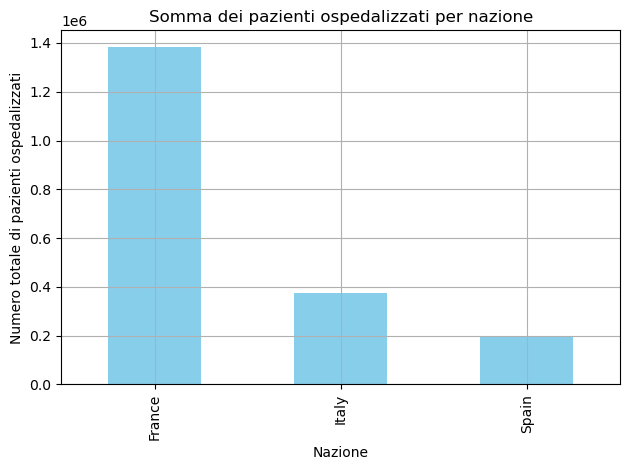

In [343]:
# calcolo somma pazienti ospedalizzati per nazione
it_fr_sp = df[(df["location"].str.contains("Italy|France|Spain")) &
              (df["date"] >= "2023-01-01") & 
              (df["date"] <= "2023-03-31")]

hosp_sum = it_fr_sp.groupby("location")["hosp_patients"].sum()
hosp_sum

# grafico a barre
hosp_sum.plot(kind="bar", color="skyblue")

plt.title("Somma dei pazienti ospedalizzati per nazione")
plt.xlabel("Nazione")
plt.ylabel("Numero totale di pazienti ospedalizzati")
plt.grid(True)
plt.tight_layout()


In [ ]:
# dal grafico si evince che per i primi 3 mesi del 2023, la Francia risulta avere molti più pazienti ospedalizzari rispetto alle nazioni di Italia e Spagna.